### Two Intervals at Decompactification Limit

Note that in this case we can also fix $\eta$ while varying $x$. (But the Mathematica file not able to compute the correct entropy at around x=0.38, not sure how to fix).

Only approximate analytic result known. We will temporily take it as the correct entropy.

Fix $x=0.5$, $\epsilon^2=0.1$.

$\eta=0.1 \to 0.6$ with $\delta \eta=0.00005$

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>") 
# to restart the kernel, prevent from reusing any trained models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

df = pd.read_csv('Data_Two_Interval_decom.csv', encoding='utf-8', encoding_errors='ignore')
df


,Correct Entropy,Approx Entropy,1,2,3,4,5,6,7,8,...,41,42,43,44,45,46,47,48,49,50
0,1.12975,1.051520,0.430566,0.167547,0.093206,0.060747,0.043319,0.032746,0.025789,0.020937,...,0.001500,0.001441,0.001386,0.001335,0.001286,0.001240,0.001197,0.001160,0.00112,0.001080
1,1.13000,1.051750,0.430708,0.167571,0.093220,0.060756,0.043325,0.032751,0.025793,0.020940,...,0.001500,0.001442,0.001386,0.001335,0.001286,0.001240,0.001197,0.001160,0.00112,0.001080
2,1.13025,1.051990,0.430850,0.167595,0.093233,0.060765,0.043332,0.032756,0.025797,0.020944,...,0.001500,0.001442,0.001387,0.001335,0.001286,0.001241,0.001197,0.001160,0.00112,0.001080
3,1.13050,1.052220,0.430992,0.167619,0.093247,0.060774,0.043339,0.032761,0.025801,0.020947,...,0.001500,0.001442,0.001387,0.001335,0.001287,0.001241,0.001197,0.001160,0.00112,0.001080
4,1.13075,1.052460,0.431134,0.167643,0.093261,0.060783,0.043345,0.032766,0.025805,0.020950,...,0.001501,0.001442,0.001387,0.001336,0.001287,0.001241,0.001198,0.001160,0.00112,0.001080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.02542,1.881234,0.767481,0.306994,0.169992,0.109344,0.077010,0.057678,0.045153,0.036535,...,0.002688,0.002585,0.002488,0.002396,0.002310,0.002228,0.002152,0.002079,0.00201,0.001945
9996,2.02547,1.881272,0.767491,0.307001,0.169997,0.109347,0.077012,0.057680,0.045154,0.036536,...,0.002688,0.002585,0.002488,0.002396,0.002310,0.002228,0.002152,0.002079,0.00201,0.001945
9997,2.02551,1.881310,0.767500,0.307007,0.170001,0.109350,0.077014,0.057681,0.045156,0.036537,...,0.002688,0.002585,0.002488,0.002396,0.002310,0.002229,0.002152,0.002079,0.00201,0.001945
9998,2.02555,1.881347,0.767510,0.307014,0.170005,0.109353,0.077016,0.057683,0.045157,0.036538,...,0.002688,0.002585,0.002488,0.002396,0.002310,0.002229,0.002152,0.002079,0.00201,0.001945


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\zxpet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


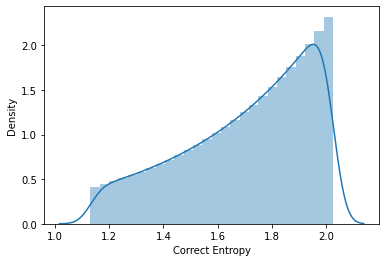

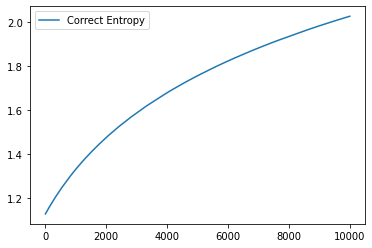

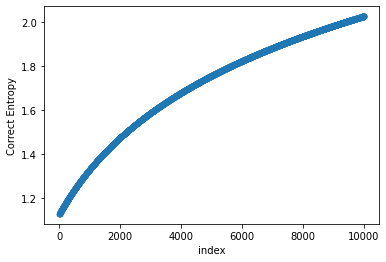

In [2]:
# Here we should check the data
# If there are problems with data (e.g. extreme values, weired distribution), use Scaler in the next block

print(sns.distplot(df['Correct Entropy']))
# Safe to ignore warnings

print(df.plot(y='Correct Entropy', use_index=True))

print(df.reset_index().plot.scatter(x='index',y='Correct Entropy'))

In [3]:
df1 = df.drop(['Correct Entropy','Approx Entropy'], axis = 1)

# do the splitting twice for to separate the data points to train-validation-test sets, we do 80-10-10%.

X = df1
y = df['Correct Entropy']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=1.0/9, random_state=42) 
# 1.0/9 x 0.9 = 0.1

def build_model(hp):
    units = hp.Int(name="units", min_value=16, max_value=64, step=16)
    # sample hyperparameter values from hp object. After sampling, these values (such as "units" variables here) 
    # are just regular Python constants.
    model = keras.Sequential([
        layers.Dense(units, activation="relu"),
        layers.Dense(1)
    ])
    optimizer = hp.Choice(name="optimizer", values=["rmsprop", "adam"])
    # different kinds of hyperparameters are available: Int, Float, Boolean, Choice, Fixed
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])
    return model 
    # the function returns a compiled model
    
# note we can also use hp.xxx to tune layers, activation functions etc.

tuner = kt.BayesianOptimization(build_model, # specify the model-building fun (or hypermodel instance)
                                objective="val_loss", 
                                # specify the metric that the tuner will seek to optimize, always specify validation metrics,
                                # since the goal of the search process is to find models that generalize
                                max_trials=10, # max number of different model configurations ("trials")
                                executions_per_trial=2, 
                                # To reduce metrics variance, you can train the same model multiple times and 
                                # average the results. This is how many training rounds (executions) to run for each trial. 
                                directory="DecomTest", # where to store search logs
                                overwrite=True, 
                                #whether to overwrite data in directory to start a new search. 
                                # Set this to True if you have modified the model-building fun, or to False to resume 
                                # a previously started search with the same model-building fun.
                                ) 

callbacks = [keras.callbacks.EarlyStopping(monitor="val_loss", patience=5),] 
# patience=x: interrupts training when monitor has stopped improving for x epochs

tuner.search(x = X_train, y = y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val), callbacks=callbacks, verbose=2,)
# this takes the same arguments as fit() (it simply passes them down to fit() for each new model)

# here use a large number of epochs (you don't know in advance how many epochs each model will need), and use an EarlyStopping
# callback to stop training when you start overfitting.

# print(tuner.search_space_summary())

Trial 10 Complete [00h 00m 03s]
val_loss: 3.385104355402291e-05

Best val_loss So Far: 3.385104355402291e-05
Total elapsed time: 00h 00m 58s
INFO:tensorflow:Oracle triggered exit


In [4]:
# query the best hyperparameter configurations, can then be used to retrain
# we can then pass to the model-building function

top_n = 4 # query the best 4
best_hps = tuner.get_best_hyperparameters(top_n) 
best_hps # returns a list

In [5]:
# Build the model with the best hp and retrain the model by itself "with the entire dataset"
# We will need to increase slightly the epochs as we are training on the entire dataset.

model = build_model(best_hps[0])
model.fit(X_train_full, y_train_full, epochs=60)

Epoch 1/60
282/282 [==============================] - 0s 476us/step - loss: 0.5426 - mae: 0.5101
Epoch 2/60
282/282 [==============================] - 0s 458us/step - loss: 0.0025 - mae: 0.0401
Epoch 3/60
282/282 [==============================] - 0s 465us/step - loss: 2.0531e-04 - mae: 0.0113
Epoch 4/60
282/282 [==============================] - 0s 458us/step - loss: 6.5791e-05 - mae: 0.0068
Epoch 5/60
282/282 [==============================] - 0s 461us/step - loss: 6.5217e-05 - mae: 0.0071
Epoch 6/60
282/282 [==============================] - 0s 472us/step - loss: 6.4314e-05 - mae: 0.0070
Epoch 7/60
282/282 [==============================] - 0s 483us/step - loss: 6.4199e-05 - mae: 0.0071
Epoch 8/60
282/282 [==============================] - 0s 483us/step - loss: 6.3430e-05 - mae: 0.0071
Epoch 9/60
282/282 [==============================] - 0s 472us/step - loss: 6.3368e-05 - mae: 0.0072
Epoch 10/60
282/282 [==============================] - 0s 479us/step - loss: 6.3173e-05 - mae: 0.00

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 48)                2448      
                                                                 
 dense_3 (Dense)             (None, 1)                 49        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


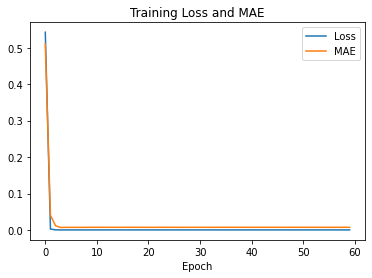

     Correct Entropy  Model Predictions
0            1.83841           1.845508
1            1.73304           1.740157
2            1.44152           1.447060
3            1.73736           1.744484
4            1.72069           1.727786
..               ...                ...
995          1.67243           1.679376
996          1.86398           1.871001
997          1.60693           1.613569
998          1.46890           1.474636
999          1.91991           1.926653

[1000 rows x 2 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


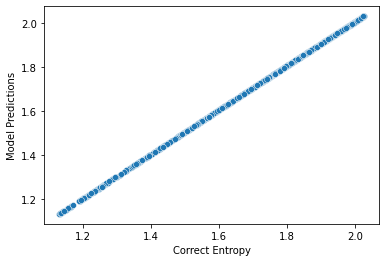

In [7]:
plt.plot(model.history.history["loss"], label="Loss")
plt.plot(model.history.history["mae"], label="MAE")
plt.title("Training Loss and MAE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# note that we don't need to plot the val_loss as we are training on the full dataset except test data

test_predictions = model.predict(X_test)
test_pred = pd.DataFrame(test_predictions)
test_pred.columns = ['Model Predictions']

pred_df = pd.DataFrame(y_test)
pred_df_reset_index = pred_df.reset_index(drop=True)

df_compare = pd.concat([pred_df_reset_index, test_pred], axis = 1)
print(df_compare)

print(sns.scatterplot(x='Correct Entropy', y='Model Predictions', data=df_compare))

In [8]:
# compute percent relative error (=(|absolute error|/true value)*100%)

# extract the X_test and then sum each row to get the approximate entropy
df_approx = pd.DataFrame(X_test)
df_approx_reset_index = df_approx.reset_index(drop=True)
df_approx1 = df_approx_reset_index.sum(axis = 1)
df_approx1 = pd.DataFrame(df_approx1)
df_approx1.columns = ['Approximate Entropy']


df_compare1 = pd.concat([df_compare, df_approx1], axis = 1)
print(df_compare1)


# absolute error for model predictions and approximate entropy

df_abs_error1 = abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])
df_abs_error2 = abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])
df_abs_error = pd.concat([df_abs_error1, df_abs_error2], axis = 1)
df_abs_error.columns = ['Abs Error for Model', 'Abs Error for Approx']
print(df_abs_error)

# percent relative error for model predictions and approximate entropy

df_rel_error1 = (abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])/df_compare1['Correct Entropy'])*100
df_rel_error2 = (abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])/df_compare1['Correct Entropy'])*100
df_rel_error = pd.concat([df_rel_error1, df_rel_error2], axis = 1)
df_rel_error.columns = ['Rel Error for Model', 'Rel Error for Approx']
print(df_rel_error)

     Correct Entropy  Model Predictions  Approximate Entropy
0            1.83841           1.845508             1.711344
1            1.73304           1.740157             1.614747
2            1.44152           1.447060             1.344569
3            1.73736           1.744484             1.618719
4            1.72069           1.727786             1.603391
..               ...                ...                  ...
995          1.67243           1.679376             1.558920
996          1.86398           1.871001             1.734694
997          1.60693           1.613569             1.498375
998          1.46890           1.474636             1.370113
999          1.91991           1.926653             1.785639

[1000 rows x 3 columns]
     Abs Error for Model  Abs Error for Approx
0               0.007098              0.127066
1               0.007117              0.118293
2               0.005540              0.096951
3               0.007124              0.118641
4       

In [9]:
best_models = tuner.get_best_models(top_n)
best_models

In [10]:
model = best_models[2] 
model.fit(X_train_full, y_train_full, epochs=10)

Epoch 1/10
282/282 [==============================] - 0s 504us/step - loss: 1.0683e-05 - mae: 0.0028
Epoch 2/10
282/282 [==============================] - 0s 493us/step - loss: 7.2428e-06 - mae: 0.0023
Epoch 3/10
282/282 [==============================] - 0s 500us/step - loss: 6.5828e-06 - mae: 0.0022
Epoch 4/10
282/282 [==============================] - 0s 493us/step - loss: 6.2946e-06 - mae: 0.0022
Epoch 5/10
282/282 [==============================] - 0s 504us/step - loss: 6.0342e-06 - mae: 0.0021
Epoch 6/10
282/282 [==============================] - 0s 511us/step - loss: 5.8065e-06 - mae: 0.0021
Epoch 7/10
282/282 [==============================] - 0s 508us/step - loss: 5.5183e-06 - mae: 0.0020
Epoch 8/10
282/282 [==============================] - 0s 508us/step - loss: 5.2133e-06 - mae: 0.0020
Epoch 9/10
282/282 [==============================] - 0s 515us/step - loss: 4.8541e-06 - mae: 0.0019
Epoch 10/10
282/282 [==============================] - 0s 497us/step - loss: 4.5229e-06 - m

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                2448      
                                                                 
 dense_1 (Dense)             (None, 1)                 49        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


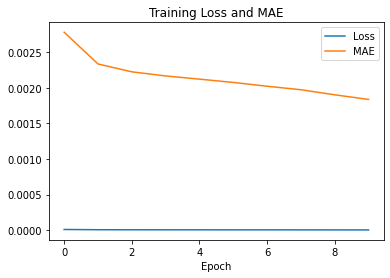

     Correct Entropy  Model Predictions
0            1.83841           1.839668
1            1.73304           1.735395
2            1.44152           1.441773
3            1.73736           1.739694
4            1.72069           1.723101
..               ...                ...
995          1.67243           1.674894
996          1.86398           1.864780
997          1.60693           1.609134
998          1.46890           1.469569
999          1.91991           1.919430

[1000 rows x 2 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


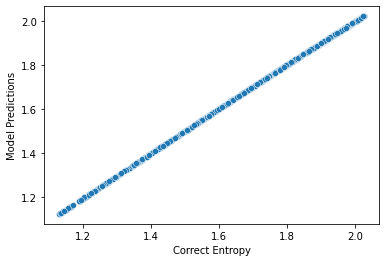

In [12]:
plt.plot(model.history.history["loss"], label="Loss")
plt.plot(model.history.history["mae"], label="MAE")
plt.title("Training Loss and MAE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# note that we don't need to plot the val_loss as we are training on the full dataset except test data

test_predictions = model.predict(X_test)
test_pred = pd.DataFrame(test_predictions)
test_pred.columns = ['Model Predictions']

pred_df = pd.DataFrame(y_test)
pred_df_reset_index = pred_df.reset_index(drop=True)

df_compare = pd.concat([pred_df_reset_index, test_pred], axis = 1)
print(df_compare)

print(sns.scatterplot(x='Correct Entropy', y='Model Predictions', data=df_compare))

In [13]:
# compute percent relative error (=(|absolute error|/true value)*100%)

# extract the X_test and then sum each row to get the approximate entropy
df_approx = pd.DataFrame(X_test)
df_approx_reset_index = df_approx.reset_index(drop=True)
df_approx1 = df_approx_reset_index.sum(axis = 1)
df_approx1 = pd.DataFrame(df_approx1)
df_approx1.columns = ['Approximate Entropy']


df_compare1 = pd.concat([df_compare, df_approx1], axis = 1)
print(df_compare1)


# absolute error for model predictions and approximate entropy

df_abs_error1 = abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])
df_abs_error2 = abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])
df_abs_error = pd.concat([df_abs_error1, df_abs_error2], axis = 1)
df_abs_error.columns = ['Abs Error for Model', 'Abs Error for Approx']
print(df_abs_error)

# percent relative error for model predictions and approximate entropy

df_rel_error1 = (abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])/df_compare1['Correct Entropy'])*100
df_rel_error2 = (abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])/df_compare1['Correct Entropy'])*100
df_rel_error = pd.concat([df_rel_error1, df_rel_error2], axis = 1)
df_rel_error.columns = ['Rel Error for Model', 'Rel Error for Approx']
print(df_rel_error)

     Correct Entropy  Model Predictions  Approximate Entropy
0            1.83841           1.839668             1.711344
1            1.73304           1.735395             1.614747
2            1.44152           1.441773             1.344569
3            1.73736           1.739694             1.618719
4            1.72069           1.723101             1.603391
..               ...                ...                  ...
995          1.67243           1.674894             1.558920
996          1.86398           1.864780             1.734694
997          1.60693           1.609134             1.498375
998          1.46890           1.469569             1.370113
999          1.91991           1.919430             1.785639

[1000 rows x 3 columns]
     Abs Error for Model  Abs Error for Approx
0               0.001258              0.127066
1               0.002355              0.118293
2               0.000253              0.096951
3               0.002334              0.118641
4       

### Reduce the dimensions of data (keep only k=10).

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>") 
# to restart the kernel, prevent from reusing any trained models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

df = pd.read_csv('Data_Two_Interval_decom.csv', encoding='utf-8', encoding_errors='ignore')

df1 = df.drop(['Correct Entropy','Approx Entropy'], axis = 1)

df2 = df1.iloc[range(0,10000),range(0,10)]
df2

# note that in the end we need to re-compute the approximate entropy by summing each row

,1,2,3,4,5,6,7,8,9,10
0,0.430566,0.167547,0.093206,0.060747,0.043319,0.032746,0.025789,0.020937,0.017402,0.014736
1,0.430708,0.167571,0.093220,0.060756,0.043325,0.032751,0.025793,0.020940,0.017404,0.014738
2,0.430850,0.167595,0.093233,0.060765,0.043332,0.032756,0.025797,0.020944,0.017407,0.014740
3,0.430992,0.167619,0.093247,0.060774,0.043339,0.032761,0.025801,0.020947,0.017410,0.014743
4,0.431134,0.167643,0.093261,0.060783,0.043345,0.032766,0.025805,0.020950,0.017412,0.014745
...,...,...,...,...,...,...,...,...,...,...
9995,0.767481,0.306994,0.169992,0.109344,0.077010,0.057678,0.045153,0.036535,0.030320,0.025669
9996,0.767491,0.307001,0.169997,0.109347,0.077012,0.057680,0.045154,0.036536,0.030321,0.025670
9997,0.767500,0.307007,0.170001,0.109350,0.077014,0.057681,0.045156,0.036537,0.030322,0.025671
9998,0.767510,0.307014,0.170005,0.109353,0.077016,0.057683,0.045157,0.036538,0.030323,0.025671


In [2]:
X = df2
y = df['Correct Entropy']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=1.0/9, random_state=42) 
# 1.0/9 x 0.9 = 0.1

def build_model(hp):
    units = hp.Int(name="units", min_value=16, max_value=64, step=16)
    # sample hyperparameter values from hp object. After sampling, these values (such as "units" variables here) 
    # are just regular Python constants.
    model = keras.Sequential([
        layers.Dense(units, activation="relu"),
        layers.Dense(1)
    ])
    optimizer = hp.Choice(name="optimizer", values=["rmsprop", "adam"])
    # different kinds of hyperparameters are available: Int, Float, Boolean, Choice, Fixed
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])
    return model 
    # the function returns a compiled model
    
# note we can also use hp.xxx to tune layers, activation functions etc.

tuner = kt.BayesianOptimization(build_model, # specify the model-building fun (or hypermodel instance)
                                objective="val_loss", 
                                # specify the metric that the tuner will seek to optimize, always specify validation metrics,
                                # since the goal of the search process is to find models that generalize
                                max_trials=10, # max number of different model configurations ("trials")
                                executions_per_trial=2, 
                                # To reduce metrics variance, you can train the same model multiple times and 
                                # average the results. This is how many training rounds (executions) to run for each trial. 
                                directory="DecomTest", # where to store search logs
                                overwrite=True, 
                                #whether to overwrite data in directory to start a new search. 
                                # Set this to True if you have modified the model-building fun, or to False to resume 
                                # a previously started search with the same model-building fun.
                                ) 

callbacks = [keras.callbacks.EarlyStopping(monitor="val_loss", patience=5),] 
# patience=x: interrupts training when monitor has stopped improving for x epochs

tuner.search(x = X_train, y = y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val), callbacks=callbacks, verbose=2,)
# this takes the same arguments as fit() (it simply passes them down to fit() for each new model)

# here use a large number of epochs (you don't know in advance how many epochs each model will need), and use an EarlyStopping
# callback to stop training when you start overfitting.

# print(tuner.search_space_summary())

Trial 10 Complete [00h 00m 03s]
val_loss: 5.9628766393871047e-05

Best val_loss So Far: 2.340614537388319e-05
Total elapsed time: 00h 00m 41s
INFO:tensorflow:Oracle triggered exit


In [3]:
tuner.results_summary()

Results summary
Results in DecomTest\untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units: 16
optimizer: rmsprop
Score: 2.340614537388319e-05
Trial summary
Hyperparameters:
units: 16
optimizer: rmsprop
Score: 2.5889024982461706e-05
Trial summary
Hyperparameters:
units: 16
optimizer: rmsprop
Score: 3.698547970998334e-05
Trial summary
Hyperparameters:
units: 16
optimizer: rmsprop
Score: 3.9498458136222325e-05
Trial summary
Hyperparameters:
units: 16
optimizer: rmsprop
Score: 4.4823373173130676e-05
Trial summary
Hyperparameters:
units: 16
optimizer: rmsprop
Score: 4.525295207713498e-05
Trial summary
Hyperparameters:
units: 16
optimizer: rmsprop
Score: 5.9628766393871047e-05
Trial summary
Hyperparameters:
units: 32
optimizer: rmsprop
Score: 6.574549843207933e-05
Trial summary
Hyperparameters:
units: 64
optimizer: rmsprop
Score: 0.00012282315947231837
Trial summary
Hyperparameters:
units: 16
optimizer: adam
Score: 0.0018395

In [4]:
# query the best hyperparameter configurations, can then be used to retrain
# we can then pass to the model-building function

top_n = 4 # query the best 4
best_hps = tuner.get_best_hyperparameters(top_n) 
best_hps # returns a list

In [5]:
# Build the model with the best hp and retrain the model by itself "with the entire dataset"
# We will need to increase slightly the epochs as we are training on the entire dataset.

model = build_model(best_hps[0])
model.fit(X_train_full, y_train_full, epochs=60)

Epoch 1/60
282/282 [==============================] - 0s 454us/step - loss: 2.5345 - mae: 1.5674
Epoch 2/60
282/282 [==============================] - 0s 444us/step - loss: 1.0912 - mae: 1.0011
Epoch 3/60
282/282 [==============================] - 0s 451us/step - loss: 0.1095 - mae: 0.2621
Epoch 4/60
282/282 [==============================] - 0s 451us/step - loss: 0.0190 - mae: 0.1154
Epoch 5/60
282/282 [==============================] - 0s 454us/step - loss: 0.0137 - mae: 0.0978
Epoch 6/60
282/282 [==============================] - 0s 447us/step - loss: 0.0088 - mae: 0.0787
Epoch 7/60
282/282 [==============================] - 0s 451us/step - loss: 0.0048 - mae: 0.0583
Epoch 8/60
282/282 [==============================] - 0s 447us/step - loss: 0.0018 - mae: 0.0353
Epoch 9/60
282/282 [==============================] - 0s 472us/step - loss: 3.4866e-04 - mae: 0.0154
Epoch 10/60
282/282 [==============================] - 0s 507us/step - loss: 4.4295e-05 - mae: 0.0055
Epoch 11/60
282/282 [

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                176       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


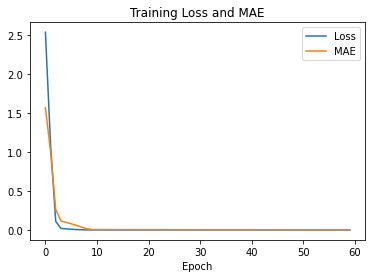

     Correct Entropy  Model Predictions
0            1.83841           1.839425
1            1.73304           1.734885
2            1.44152           1.441939
3            1.73736           1.739190
4            1.72069           1.722578
..               ...                ...
995          1.67243           1.674358
996          1.86398           1.864636
997          1.60693           1.608683
998          1.46890           1.469609
999          1.91991           1.919530

[1000 rows x 2 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


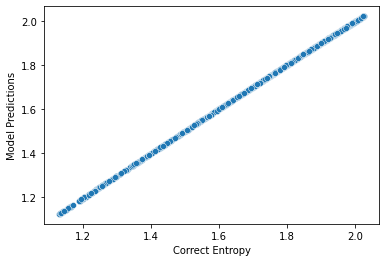

In [7]:
plt.plot(model.history.history["loss"], label="Loss")
plt.plot(model.history.history["mae"], label="MAE")
plt.title("Training Loss and MAE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# note that we don't need to plot the val_loss as we are training on the full dataset except test data

test_predictions = model.predict(X_test)
test_pred = pd.DataFrame(test_predictions)
test_pred.columns = ['Model Predictions']

pred_df = pd.DataFrame(y_test)
pred_df_reset_index = pred_df.reset_index(drop=True)

df_compare = pd.concat([pred_df_reset_index, test_pred], axis = 1)
print(df_compare)

print(sns.scatterplot(x='Correct Entropy', y='Model Predictions', data=df_compare))

In [8]:
# compute percent relative error (=(|absolute error|/true value)*100%)

# extract the X_test and then sum each row to get the approximate entropy
df_approx = pd.DataFrame(X_test)
df_approx_reset_index = df_approx.reset_index(drop=True)
df_approx1 = df_approx_reset_index.sum(axis = 1)
df_approx1 = pd.DataFrame(df_approx1)
df_approx1.columns = ['Approximate Entropy']


df_compare1 = pd.concat([df_compare, df_approx1], axis = 1)
print(df_compare1)


# absolute error for model predictions and approximate entropy

df_abs_error1 = abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])
df_abs_error2 = abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])
df_abs_error = pd.concat([df_abs_error1, df_abs_error2], axis = 1)
df_abs_error.columns = ['Abs Error for Model', 'Abs Error for Approx']
print(df_abs_error)

# percent relative error for model predictions and approximate entropy

df_rel_error1 = (abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])/df_compare1['Correct Entropy'])*100
df_rel_error2 = (abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])/df_compare1['Correct Entropy'])*100
df_rel_error = pd.concat([df_rel_error1, df_rel_error2], axis = 1)
df_rel_error.columns = ['Rel Error for Model', 'Rel Error for Approx']
print(df_rel_error)

     Correct Entropy  Model Predictions  Approximate Entropy
0            1.83841           1.839425             1.484465
1            1.73304           1.734885             1.402405
2            1.44152           1.441939             1.168037
3            1.73736           1.739190             1.405798
4            1.72069           1.722578             1.392694
..               ...                ...                  ...
995          1.67243           1.674358             1.354538
996          1.86398           1.864636             1.504148
997          1.60693           1.608683             1.302283
998          1.46890           1.469609             1.190474
999          1.91991           1.919530             1.546872

[1000 rows x 3 columns]
     Abs Error for Model  Abs Error for Approx
0               0.001015              0.353945
1               0.001845              0.330635
2               0.000419              0.273483
3               0.001830              0.331562
4       